- Document avec mes simulations de tous les modèles du cours de dynamique des populations.
- Les contenus qui ne viennent pas du TP python: https://lmaillere.github.io/biomaths_www/ sont indiqués par un (*).


À faire : 
  - Modèle de compétition de lotka
  - Modèle avec délai : malthus,**logistique**

##### Packages utilisés
⚠️ À activer à chaque lancement.

In [1]:

%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import Symbol, solve, Derivative, re
from matplotlib import cm

# I) Populations Isolées

## A) Modèle de Malthus

Text(0, 0.5, 'Population')

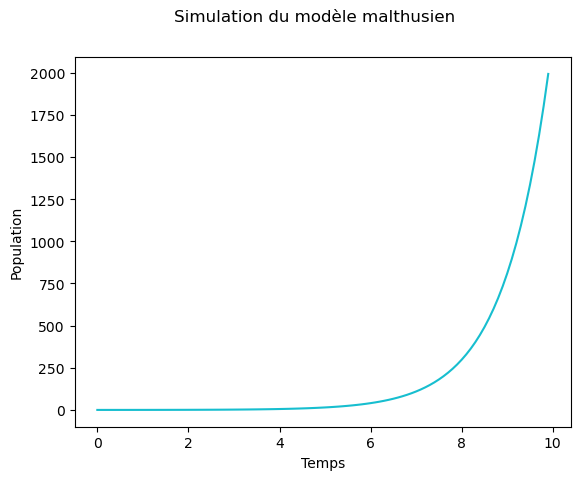

In [8]:
def malthus(x,t,p) :
    n,m=p
    xdot=(n-m)*x
    return xdot

x0=0.1

n=2
m=1
param = np.array([n,m])

ti=np.arange(0,10,0.1)

int_m=odeint(malthus,x0,ti,args=(param,))

fig1,ax1 = plt.subplots(1, 1)

fig1.suptitle('Simulation du modèle malthusien')

ax1.plot(ti,int_m,color='C9',label='x\'')
ax1.set_xlabel('Temps')
ax1.set_ylabel('Population')


## B) Logistique

Text(0, 0.5, 'Densité de pop')

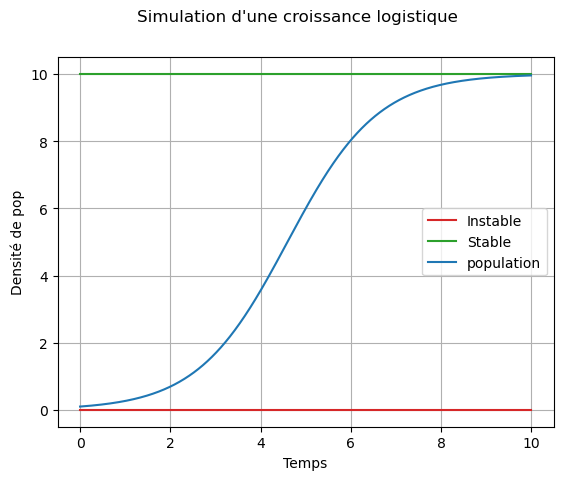

In [28]:
def logistic(x,t,params):
    r,K=params
    xdot=r*x*(1-x/K)
    return xdot

ti=np.arange(0,10,0.01)
r=1
K=10
params_l=np.array([r,K])
x0=0.1

int_l=odeint(logistic,x0,ti,args=(params_l,))

fig3,axe3=plt.subplots(1,1)
fig3.suptitle('Simulation d\'une croissance logistique')
axe3.plot(ti,np.zeros(len(ti)),color='C3',label='Instable')
axe3.plot(ti,K*np.ones(len(ti)),color='C2',label='Stable')
axe3.plot(ti,int_l,label='population')
axe3.legend()
axe3.grid()
axe3.set_xlabel('Temps')
axe3.set_ylabel('Densité de pop')


## C) Effet Allee

### 1) Effet Allee fort :

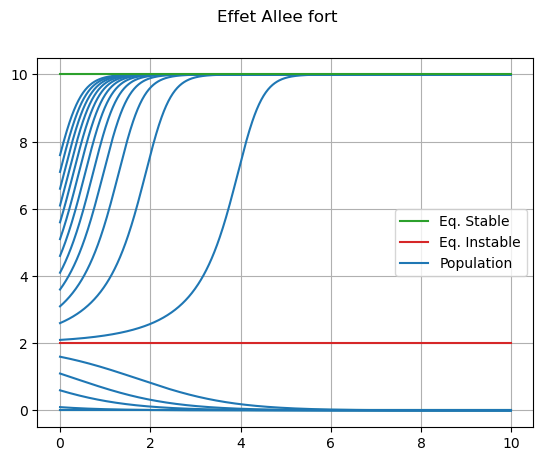

In [40]:
def Alleef(etat,t,param):
    x=etat
    r,eps,K=param
    xdot=r*x*(-1+x/eps)*(1-x/K)
    return xdot

r=1
eps=2
K=10
param_alleef=np.array([r,eps,K])
ti=np.arange(0,10,0.01)

#Fonction qui a une condtion initiale donne le odeint associé

def c0(x0,t,param):
    param=param_alleef
    t=ti
    simc0=odeint(Alleef,x0,t,args=(param,))
    return simc0

x0i=np.arange(0.1,8,0.5)

fig4,axe4 = plt.subplots(1,1)
fig4.suptitle('Effet Allee fort')

for i in range(0,len(x0i)):
    axe4.plot(ti,c0(x0i[i],ti,param_alleef),color='C0')   

axe4.plot(ti,np.zeros(len(ti)),color='C2',label='Eq. Stable')
axe4.plot(ti,K*np.ones(len(ti)),color='C2')
axe4.plot(ti,eps*np.ones(len(ti)),color='C3',label='Eq. Instable')

axe4.plot(ti,c0(0,ti,param_alleef),color='C0',label='Population')   

axe4.grid()
axe4.legend()


### 2) Effet Allee faible (*)

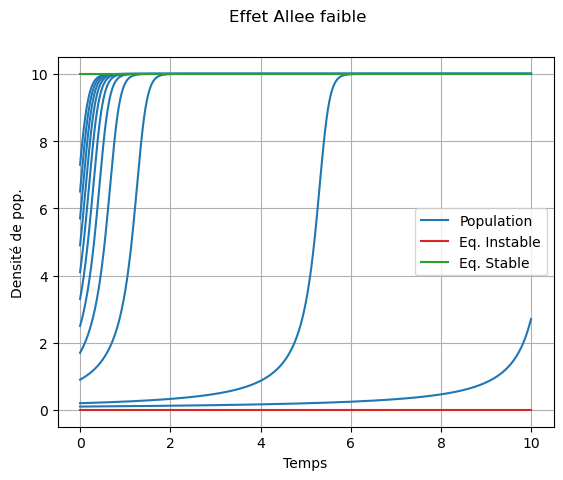

In [49]:
def Alleef(etat,t,param):
    x=etat
    r,K=param
    xdot=r*x**2*(1-x/K)
    return xdot

r=1
K=10
param_alleef=np.array([r,K])
ti=np.arange(0,10,0.01)

#Fonction qui a une condtion initiale donne le odeint associé

def c0(x0,t,param):
    param=param_alleef
    t=ti
    simc0=odeint(Alleef,x0,t,args=(param,))
    return simc0

x0i=np.arange(0.1,8,0.8)

fig4,axe4 = plt.subplots(1,1)
fig4.suptitle('Effet Allee faible')

for i in range(0,len(x0i)):
    axe4.plot(ti,c0(x0i[i],ti,param_alleef),color='C0')   
axe4.plot(ti,c0(0.2,ti,param_alleef),color='C0',label='Population')   
axe4.plot(ti,np.zeros(len(ti)),color='C3',label='Eq. Instable')
axe4.plot(ti,K*np.ones(len(ti)),color='C2',label='Eq. Stable')

axe4.set_xlabel('Temps')
axe4.set_ylabel('Densité de pop.')
axe4.grid()
axe4.legend()

# II) Populations Exploitées

## A) Prélèvements et effet Allee:

### 1) Allee Fort:

#### a) Prélèvements fixes: (*)

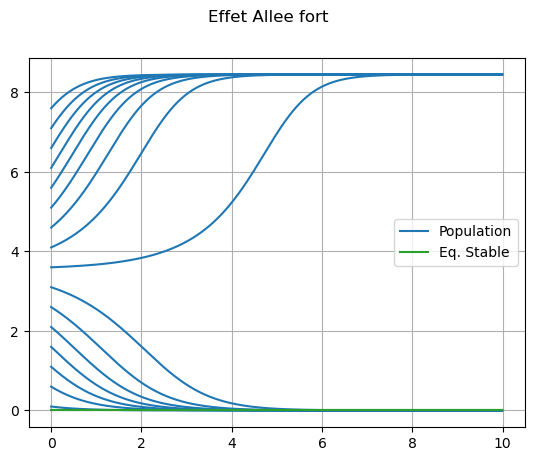

In [53]:
def Alleef(etat,t,param):
    x=etat
    r,eps,K,E=param
    xdot=r*x*(-1+x/eps)*(1-x/K) - E*x
    return xdot

r=1
eps=2
K=10
E=0.5
param_alleef=np.array([r,eps,K,E])
ti=np.arange(0,10,0.01)

#Fonction qui a une condtion initiale donne le odeint associé

def c0(x0,t,param):
    param=param_alleef
    t=ti
    simc0=odeint(Alleef,x0,t,args=(param,))
    return simc0

x0i=np.arange(0.1,8,0.5)

fig4,axe4 = plt.subplots(1,1)
fig4.suptitle('Effet Allee fort')

for i in range(0,len(x0i)):
    axe4.plot(ti,c0(x0i[i],ti,param_alleef),color='C0')   
axe4.plot(ti,c0(0,ti,param_alleef),color='C0',label='Population')   

axe4.plot(ti,np.zeros(len(ti)),color='C2',label='Eq. Stable')
#axe4.plot(ti,K*np.ones(len(ti)),color='C2')
#axe4.plot(ti,eps*np.ones(len(ti)),color='C3',label='Eq. Instable')


axe4.grid()
axe4.legend()


#### b) Prélèvements variables

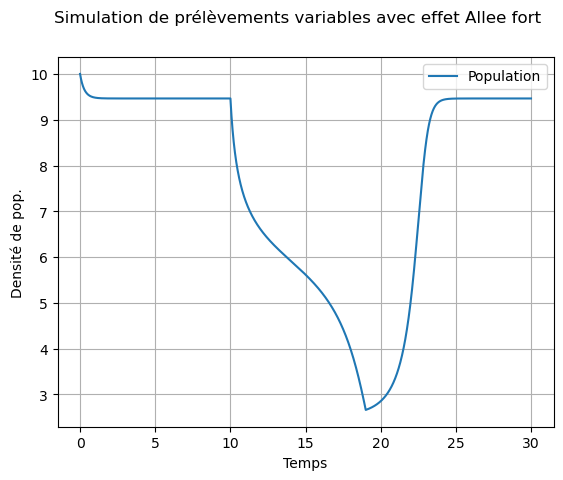

In [80]:
#Fonction de prélèvements variables

Es=0.2
Ex=0.85
Ts=10
Tx=9

param_E=np.array([Es,Ex,Ts,Tx])

def Ev(t,param):
    Es,Ex,Ts,Tx=param
    if t <= Ts or t > Ts+Tx :
        return Es
    else:
        return Ex

ti=np.arange(0,30,0.01)

def Alleef(etat,t,param):
    x=etat
    r,eps,K=param
    xdot=r*x*(-1+x/eps)*(1-x/K) - Ev(t,param_E)*x
    return xdot

r=1
eps=2
K=10
param_alleef=np.array([r,eps,K])

x0=K

int_p = odeint(Alleef,x0,ti,args=(param_alleef,))

fig, ax= plt.subplots(1,1)
fig.suptitle('Simulation de prélèvements variables avec effet Allee fort')

ax.plot(ti,int_p,color='C0',label='Population')
ax.set_xlabel('Temps')
ax.set_ylabel('Densité de pop.')
ax.legend()
ax.grid()

En fonction de Tx ou de Ex on a soit maintien de la population soit disparition. Attention, ça ne veut pas dire que dans le premier cas l'équilibre en 0 n'est pas stable simplement que la population n'a pas dépassé le point de non retour qui correspond à une densité de pop inférieur à une valeur...

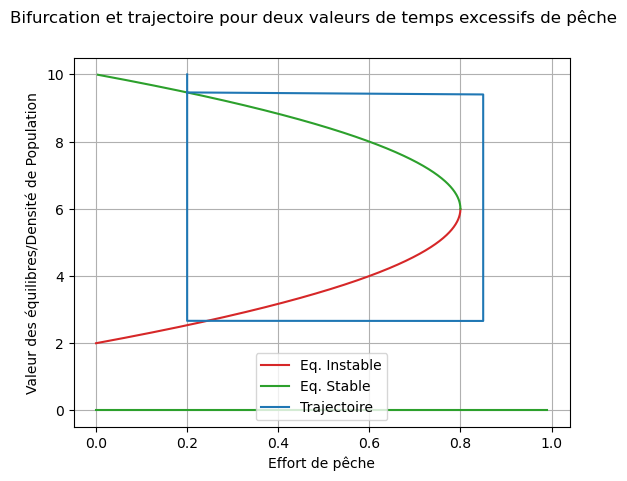

In [81]:
#Diagramme de bifurcation
#On va appliquer le même schéma que dans le cours (le retournement).

#On construit deux vecteurs où on omet les valeurs qui pourraient donner un E négatif:

xpb = np.arange(eps,(eps+K)/2,0.01)
xph = np.arange((eps+K)/2,K,0.01)

E_eq1 = r*(-1+xpb/eps)*(1-xpb/K)
E_eq2 = r*(-1+xph/eps)*(1-xph/K)

E_x = np.arange(0,1,0.01)

fig5, axe5 = plt.subplots(1,1)

fig5.suptitle('Bifurcation et trajectoire pour deux valeurs de temps excessifs de pêche')

axe5.plot(E_eq1,xpb,color='C3',label='Eq. Instable')
axe5.plot(E_eq2,xph,color='C2',label='Eq. Stable')
axe5.plot(E_x,np.zeros(len(E_x)),color='C2')

#axe6.plot(E_eq1,xpb,color='C3',label='Eq. Instable')
#axe6.plot(E_eq2,xph,color='C2',label='Eq. Stable')
#axe6.plot(E_x,np.zeros(len(E_x)),color='C2')
#axe6.grid()
#axe6.legend()

axe5.set_xlabel('Effort de pêche')
#axe6.set_xlabel('Effort de pêche')
axe5.set_ylabel('Valeur des équilibres/Densité de Population')
axe5.plot([Ev(t,param_E)for t in ti],int_p,label='Trajectoire')
axe5.grid()
axe5.legend(loc='lower center')


On peut modifier la valeur de Tx et cela entraîne la chute de la pop et donc une trajectoire différente.

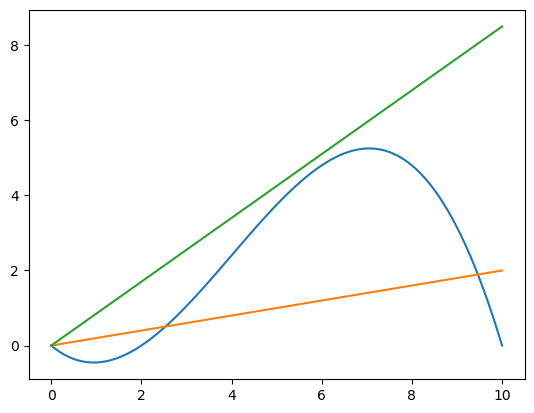

In [85]:
x=np.arange(0,10.1,0.1)
plt.plot(x,r*x*(-1+x/eps)*(1-x/K))
plt.plot(x,Es*x,color='C1')
plt.plot(x,Ex*x,color='C2')

### 2) Allee Faible: (*)

#### a) Prélèvements fixes: (*)

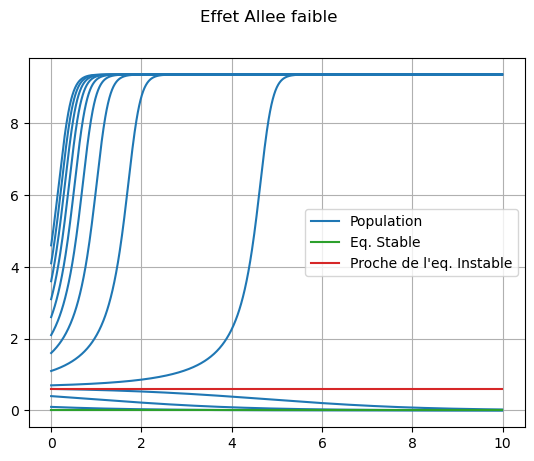

In [37]:
def Alleef(etat,t,param):
    x=etat
    r,K,E=param
    xdot=r*x**2*(1-x/K) - E*x
    return xdot

r=1
K=10
E=0.6
param_alleef=np.array([r,K,E])
ti=np.arange(0,10,0.01)

#Fonction qui a une condtion initiale donne le odeint associé

def c0(x0,t,param):
    param=param_alleef
    t=ti
    simc0=odeint(Alleef,x0,t,args=(param,))
    return simc0

x0i=np.arange(0.1,5,0.5)

fig4,axe4 = plt.subplots(1,1)
fig4.suptitle('Effet Allee faible')

for i in range(0,len(x0i)):
    axe4.plot(ti,c0(x0i[i],ti,param_alleef),color='C0')   
axe4.plot(ti,c0(0,ti,param_alleef),color='C0',label='Population')   
axe4.plot(ti,c0(0.4,ti,param_alleef),color='C0')
axe4.plot(ti,c0(0.7,ti,param_alleef),color='C0')

axe4.plot(ti,np.zeros(len(ti)),color='C2',label='Eq. Stable')
#axe4.plot(ti,K*np.ones(len(ti)),color='C2')
axe4.plot(ti,E*np.ones(len(ti)),color='C3',label='Proche de l\'eq. Instable')


axe4.grid()
axe4.legend()


#### b) Prélèvements variables: (*)

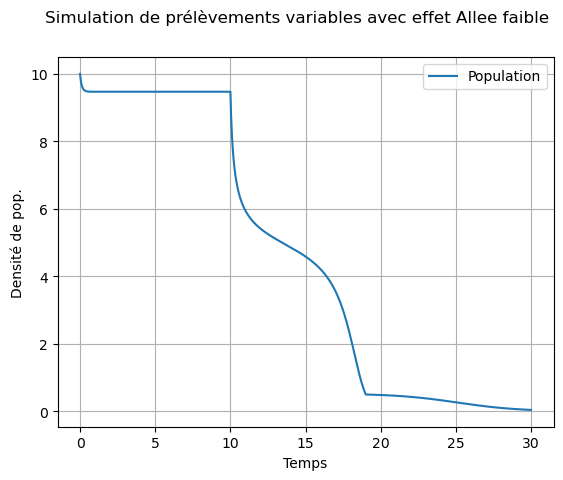

In [138]:
#Fonction de prélèvements variables

Es=0.5
Ex=2.55
Ts=10
Tx=9

param_Ea=np.array([Es,Ex,Ts,Tx])

def Eva(t,param):
    Es,Ex,Ts,Tx=param
    if t <= Ts or t > Ts+Tx :
        return Es
    else:
        return Ex

tia=np.arange(0,30,0.01)

def Alleefa(etat,t,param):
    x=etat
    r,K=param
    xdot=r*x**2*(1-x/K) - Eva(t,param_Ea)*x
    return xdot

r=1
K=10
param_alleefa=np.array([r,K])

x0=K

int_pa = odeint(Alleefa,x0,tia,args=(param_alleefa,))

fig7, ax7= plt.subplots(1,1)
fig7.suptitle('Simulation de prélèvements variables avec effet Allee faible')

ax7.plot(ti,int_pa,color='C0',label='Population')
#ax7.plot(ti,np.zeros_like(ti))
ax7.set_xlabel('Temps')
ax7.set_ylabel('Densité de pop.')
ax7.legend()
ax7.grid()


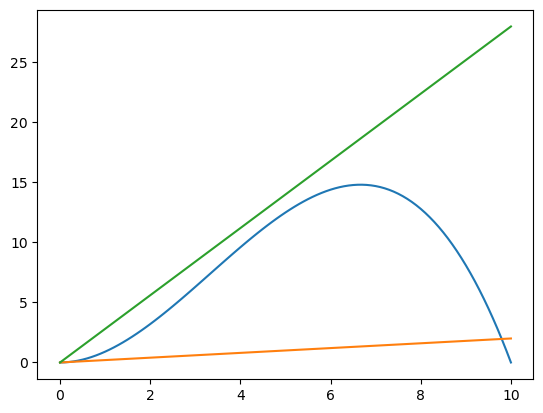

In [120]:
x=np.arange(0,10.1,0.1)
plt.plot(x,r*x**2*(1-x/K))
plt.plot(x,Es*x)
plt.plot(x,Ex*x)

On remarque qu'il faut un effort de pêche beaucoup plus fort avec un effet Allee faible pour éradiquer la population.

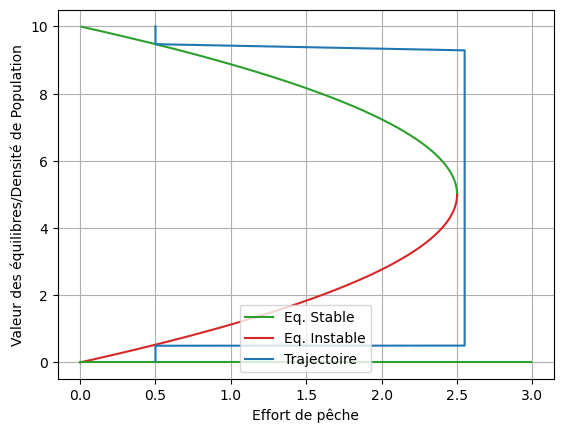

In [139]:
#Diagramme de bifurcation

xpbf = np.arange(0,K/2,0.01)
xphf = np.arange(K/2,K,0.01)

E_xf= np.arange(0,3,0.01)

E_eq1 = r*xphf*(1-xphf/K)
E_eq2 = r*xpbf*(1-xpbf/K)

fig9,axe9 = plt.subplots(1,1)

axe9.plot(E_eq1,xphf,color='C2',label='Eq. Stable')
axe9.plot(E_eq2,xpbf,color='C3',label='Eq. Instable')
axe9.plot(E_xf,np.zeros(len(E_xf)),color='C2')

axe9.set_xlabel('Effort de pêche')
axe9.set_ylabel('Valeur des équilibres/Densité de Population')
axe9.plot([Eva(t,param_Ea)for t in tia],int_pa,label='Trajectoire')
axe9.grid()
axe9.legend(loc='lower center')


#### c) Effet Allee faible et prélèvement (analyse qualitative) (*)

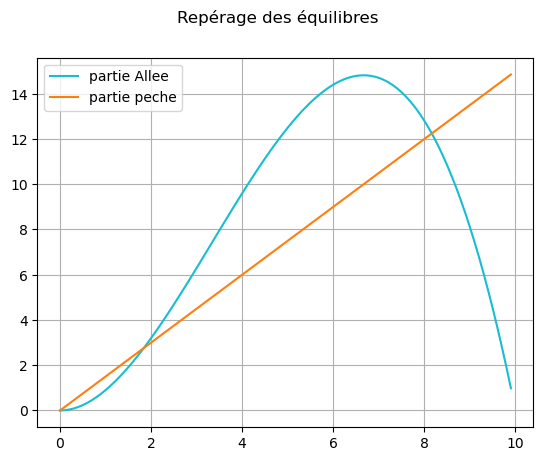

In [19]:
#Analyse qualitative

r=1
E=1.5
K=10
Ec=0.75

def allee(x,R,k):
    R=r
    k=K
    f=r*x**2*(1-x/K)
    return f

def peche(x,e):
    e=E
    f=E*x
    return f
xi = np.arange(0,10,0.1)
alleet= allee(xi,r,K)
pechet=peche(xi,E)



fig2,axe2 = plt.subplots(1,1)

fig2.suptitle('Repérage des équilibres')
axe2.plot(xi,alleet,color='C9',label='partie Allee')
axe2.plot(xi,pechet,color='C1',label='partie peche')
axe2.legend()
axe2.grid()

On a donc trois équilibres, 0 qui est tout le temps stable, x1 qui existe si E est plus petit qu'un certain rang de surpêche (et qui est instable) et x2 qui existe si pas de surpêche et qui est stable.


## B) Tordeuse du bourgeon

### 1) Population d'oiseaux constante

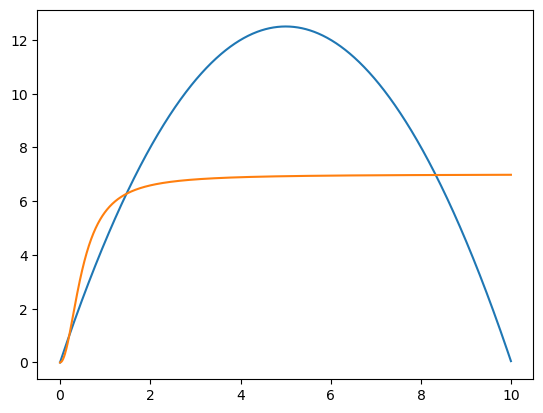

In [3]:
#Analyse qualitative
xm=np.arange(0,10,0.01)
r=5
K=10
plt.plot(xm,r*xm*(1-xm/K))
a=1
y=7
h=0.5
plt.plot(xm,(xm**2)*y/((h**2)+(xm**2)))


En faisant varier y on voit que en fonction de la quantité d'oiseau on a pas forcément le même nombre de points d'équilibres.

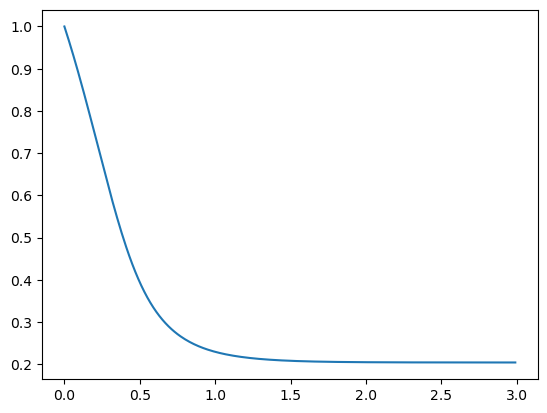

In [32]:
#Mise en forme brutale
def tord(etat,t,param):
    x=etat
    r,K,a,h,y = param
    xdot = r*x*(1-x/K)-(a*(x**2)*y)/((h**2)+x**2)
    return xdot

r=5
K=10
a=1
h=0.5
y=7

param_t=np.array([r,K,a,h,y])

ti=np.arange(0,3,0.01)

x0=1

int_t=odeint(tord,x0,ti,args=(param_t,))

plt.plot(ti,int_t)



Text(0, 0.5, 'Densité de pop.')

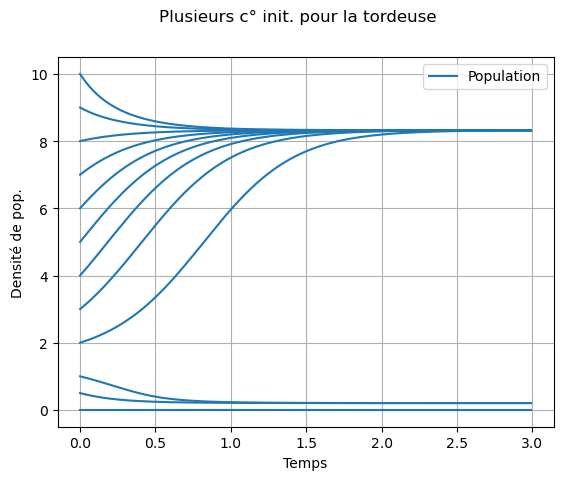

In [5]:
#Avec plusieurs conditions initiales

def int_t0(m,t,x0):
    s=odeint(m,x0,t,args=(param_t,))
    return s

x0_t=np.arange(0.1,10,0.9)

fig,ax=plt.subplots(1,1)

fig.suptitle('Plusieurs c° init. pour la tordeuse')


for i in range(0,len(x0_t)):
    ax.plot(ti,int_t0(tord,ti,i),color='C0')
ax.plot(ti,int_t0(tord,ti,0.5),color='C0',label='Population')
ax.legend()
ax.grid()
ax.set_xlabel('Temps')
ax.set_ylabel('Densité de pop.')

On observe la multistabilité, il y a 3 points d'équilibres avec 0.
On va intégrer les équilibres (positifs) grâce à numpy :


In [15]:
#Monome qu'on nomme z  0 = la constante du polynome 1 = le sclalaire
#devant z

z=np.polynomial.Polynomial([0,1])

pol=r*(1-z/K)*(h**2+z**2)-a*z*y
#On va calculer les racines du pol et garder celles interessantes (positives,réelles,plus petites que K):

eq = pol.roots()[(np.isreal(pol.roots()))*(pol.roots() < K)*(pol.roots()>0)]

On intègre les équilibres:

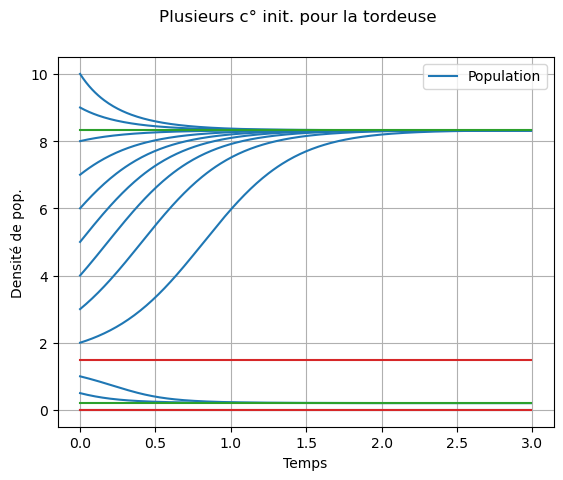

In [16]:
def int_t0(m,t,x0):
    s=odeint(m,x0,t,args=(param_t,))
    return s

x0_t=np.arange(0.1,10,0.9)

fig,ax=plt.subplots(1,1)

fig.suptitle('Plusieurs c° init. pour la tordeuse')


for i in range(0,len(x0_t)):
    ax.plot(ti,int_t0(tord,ti,i),color='C0')
ax.plot(ti,int_t0(tord,ti,0.5),color='C0',label='Population')
ax.legend()
ax.grid()
ax.set_xlabel('Temps')
ax.set_ylabel('Densité de pop.')

ax.plot(ti,eq[0]*np.ones_like(ti),color='C2',label='Stable')
ax.plot(ti,eq[1]*np.ones_like(ti),color='C3',label='Instable')
ax.plot(ti,eq[2]*np.ones_like(ti),color='C2')
ax.plot(ti,np.zeros(len(ti)),color='C3')

(-0.5, 15.0)

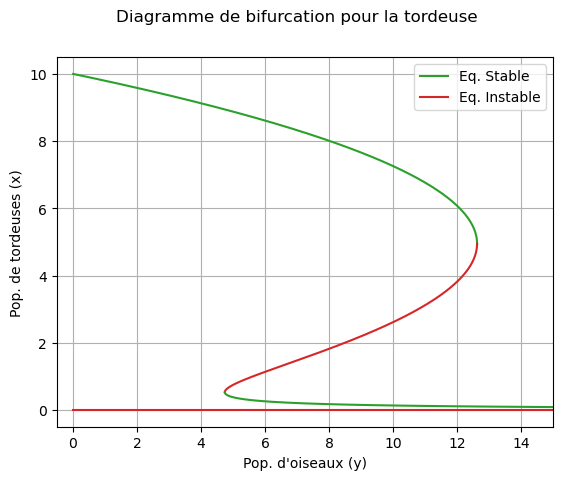

In [33]:
#Diagramme de bifurcation
#On doit trouver les pts critiques
x=Symbol('x')
#Retournement:

y=r*(1-x/K)*(h**2+x**2)/(a*x)

dy=Derivative(y,x).doit()

crit=[re(root) for root in solve(dy) if re(root)>0]

x1=np.arange(0.01,crit[0],0.01)
x2=np.arange(crit[0],crit[1],0.01)
x3=np.arange(crit[1],K,0.01)
eq1=(r*(1-x1/K)*(h**2+x1**2))/(a*x1)
eq2=(r*(1-x2/K)*(h**2+x2**2))/(a*x2)
eq3=(r*(1-x3/K)*(h**2+x3**2))/(a*x3)

#On trace le diagramme:

fig,ax=plt.subplots(1,1)

fig.suptitle('Diagramme de bifurcation pour la tordeuse')

ax.plot(eq3,x3,color='C2',label='Eq. Stable')
ax.plot(eq2,x2,color='C3',label='Eq. Instable')
ax.plot(eq1,x1,color='C2')
ax.plot(np.zeros_like(np.arange(0,20,0.1)),color='C3')
ax.grid()
ax.legend()
ax.set_xlabel('Pop. d\'oiseaux (y)')
ax.set_ylabel('Pop. de tordeuses (x)')
ax.set_xlim(left = -.50, right = 15)

### 2) Population d'oiseaux variable

Text(0, 0.5, 'Densité de population')

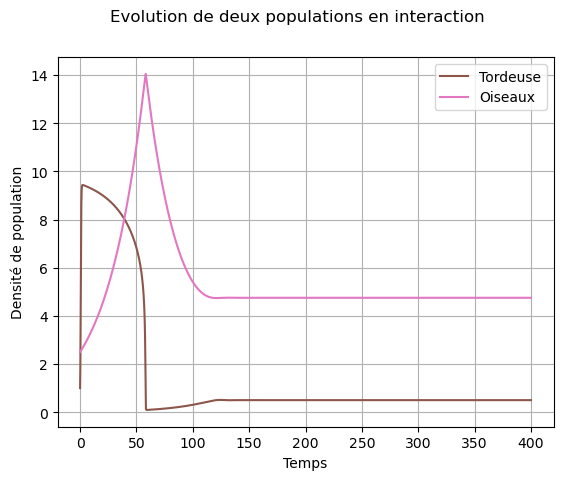

In [49]:
#Modèles:
def tord_oise(etat,t,param):
    x,y=etat
    r,K,a,h,eps,n,m= param
    xydot = [r*x*(1-x/K)-(a*(x**2)*y)/((h**2)+x**2),
             eps*y*((n*a*x**2)/(h**2+x**2)-m)]
    return xydot

#Paramètres des tordeuses
K=10
r=5
h=0.5
a=1


#Paramètres des oiseaux
eps=0.01
n=6 #natalité
m=3 #mortalité 
params_to=np.array([r,K,a,h,eps,n,m])

tiv=np.arange(0,400,0.01)
x0=1
y0=2.5
intv = odeint(tord_oise,np.array([x0,y0]),tiv,args=(params_to,))
#Première colonne = x, deuxième = y
fig,ax=plt.subplots(1,1)

fig.suptitle('Evolution de deux populations en interaction')

ax.plot(tiv,intv[:,0],color='C5',label='Tordeuse')
ax.plot(tiv,intv[:,1],color='C6',label='Oiseaux')
ax.legend()
ax.grid()
ax.set_xlabel('Temps')
ax.set_ylabel('Densité de population')

    

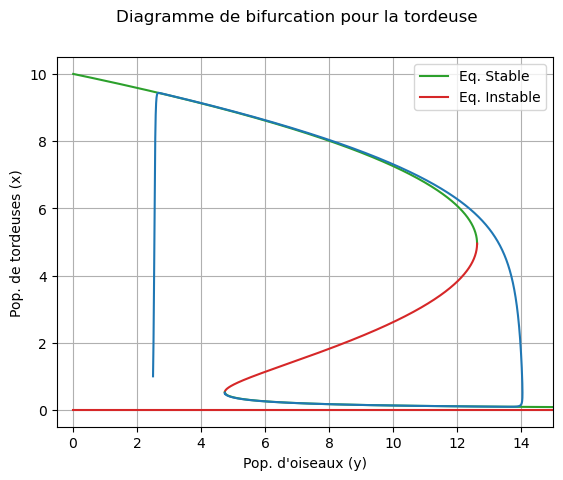

In [50]:
############
#On doit trouver les pts critiques
x=Symbol('x')
#Retournement:

y=r*(1-x/K)*(h**2+x**2)/(a*x)

dy=Derivative(y,x).doit()

crit=[re(root) for root in solve(dy) if re(root)>0]

x1=np.arange(0.01,crit[0],0.01)
x2=np.arange(crit[0],crit[1],0.01)
x3=np.arange(crit[1],K,0.01)
eq1=(r*(1-x1/K)*(h**2+x1**2))/(a*x1)
eq2=(r*(1-x2/K)*(h**2+x2**2))/(a*x2)
eq3=(r*(1-x3/K)*(h**2+x3**2))/(a*x3)

#On trace le diagramme:

fig,ax=plt.subplots(1,1)

fig.suptitle('Diagramme de bifurcation pour la tordeuse')

ax.plot(eq3,x3,color='C2',label='Eq. Stable')
ax.plot(eq2,x2,color='C3',label='Eq. Instable')
ax.plot(eq1,x1,color='C2')
ax.plot(np.zeros_like(np.arange(0,20,0.1)),color='C3')
ax.grid()
ax.legend()
ax.set_xlabel('Pop. d\'oiseaux (y)')
ax.set_ylabel('Pop. de tordeuses (x)')
ax.set_xlim(left = -.50, right = 15)
##############
#On ajoute la trajectoire

ax.plot(intv[:,1],intv[:,0],label='Trajectoire')

## C) Modèle de Schaefer (*)

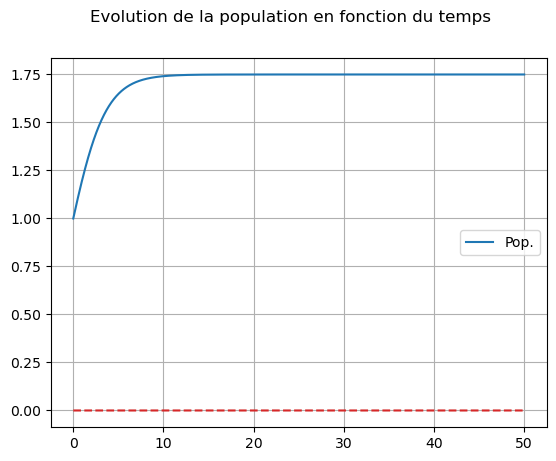

In [76]:
def Sch(etat,t,param):
    x=etat
    r,K,E=param
    xdot=r*x*(1-x/K)-E*x
    return xdot
r=2
K=5
E=1.5
param_s=np.array([r,K,E])

ti=np.arange(0,50,0.01)

x0=1

ints=odeint(Sch,x0,ti,args=(param_s,))

fig,ax=plt.subplots(1,1)
fig.suptitle('Evolution de la population en fonction du temps')
ax.plot(ti,ints,label='Pop.')
ax.legend()
ax.grid()
ax.plot(ti,np.zeros_like(ti),color='C3',label='Eq. Instable',linestyle='dashed')
    

On remarque qu'on a bien que si E est plus petit que r la population atteint un équilibre quelque soit sa condtion de départ (Le zéro est instable).
Par contre si l'effort de pêche est trop fort on a 0 qui devient stable et la population s'éteint.
E est donc un paramètre qui induit une bifurcation. <strong> Voyons le diagramme de bifurcation: </strong>

Text(0, 0.5, "Population à l'équilibre")

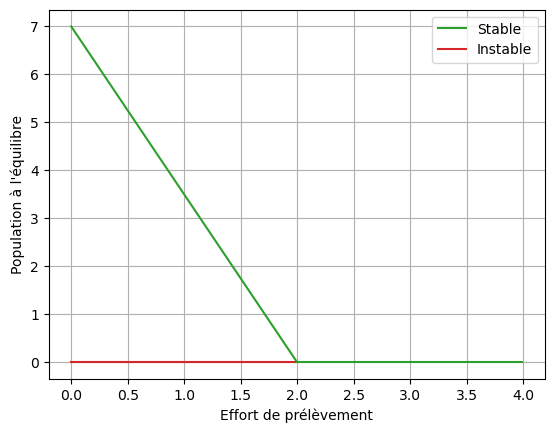

In [80]:
E_x=np.arange(0,r,0.01)
fig2,ax2=plt.subplots(1,1)
ax2.plot(E_x,(r-E_x)*K/r,color='C2',label='Stable')
ax2.plot(E_x,np.zeros_like(E_x),color='C3',label='Instable')
E_x2=np.arange(r,4,0.01)
ax2.plot(E_x2,np.zeros_like(E_x2),color='C2')

ax2.legend()
ax2.grid()
ax2.set_xlabel('Effort de prélèvement')
ax2.set_ylabel('Population à l\'équilibre')

# III) Populations en interactions

## A) Le modèle de prédation de Lotka-Volterra

### 1) Dynamique

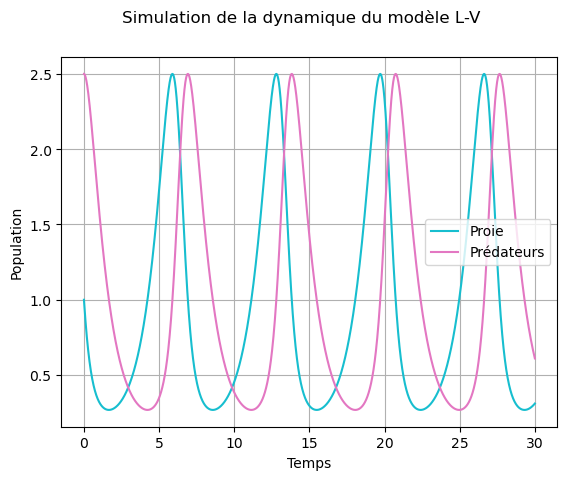

In [7]:
def lv(etat,t,param):
    x,y=etat
    r,c,b,m=param
    xydot=[r*x-c*x*y,b*x*y-m*y]
    return xydot

r=1
c=1
b=1
m=1

param_lv=np.array([r,c,b,m])

ti=np.arange(0.01,30,0.01)

x0=1
y0=2.5

etat0=np.array([x0,y0])

intlv=odeint(lv,etat0,ti,args=(param_lv,))

fig,ax=plt.subplots(1,1)
fig.suptitle('Simulation de la dynamique du modèle L-V')

ax.plot(ti,intlv[:,0],label='Proie',color='C9')
ax.plot(ti,intlv[:,1],label='Prédateurs',color='C6')
ax.set_xlabel('Temps')
ax.set_ylabel('Population')
ax.legend()
ax.grid()



### 2) Plan de phase

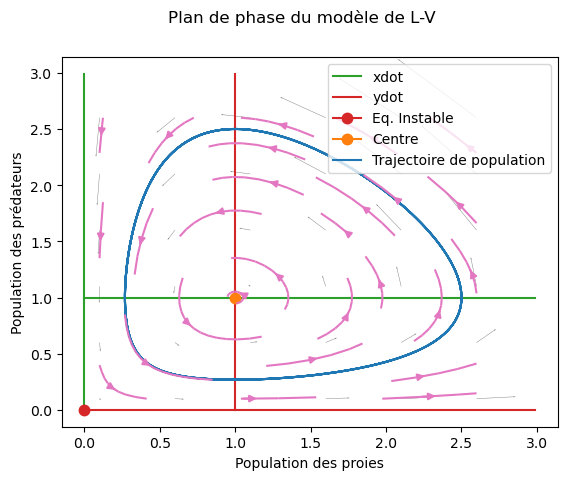

In [13]:
fig2,ax2=plt.subplots(1,1)
fig2.suptitle('Plan de phase du modèle de L-V')
t=np.arange(0,3,0.01)

#xdot: rouge
isox1=np.zeros_like(t)
isox2=(r/c)*np.ones_like(t)
#ydot: vert
isoy1=isox1
isoy2=(m/b)*np.ones_like(t)
#equilibres
e1=[0,0]
e2=[m/b,r/c]

ax2.plot(t,isox2,color='C2',label='xdot')
ax2.plot(isox1,t,color='C2')
ax2.plot(t,isoy1,color='C3',label='ydot')
ax2.plot(isoy2,t,color='C3')

ax2.plot(e1[0],e1[1],marker='.',color='C3',label='Eq. Instable',markersize=15)
ax2.set_xlabel('Population des proies')
ax2.set_ylabel('Population des prédateurs')
ax2.plot(e2[0],e2[1],marker='.',color='C1',label='Centre',markersize=15)
ax2.plot(intlv[:,0],intlv[:,1],label='Trajectoire de population')
ax2.legend()
#Ajout du champ de vecteur: fonction quiver pour les flèches
#fonction streamplot et fonction meshgrid

#Etablissement d'une grille de coordonnées:

xg=np.arange(0.1,3,0.5)
yg=np.arange(0.1,3,0.5)

X,Y=np.meshgrid(xg,yg)

dx,dy=lv([X,Y],0,param_lv)
ax2.quiver(X,Y,dx,dy,angles='xy',color='C7',width=0.0009)
ax2.streamplot(X,Y,dx,dy,color='C6',density=0.30,maxlength=0.5)

### 3) Intégrale première

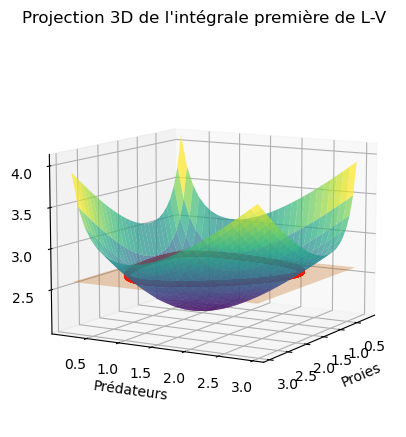

In [21]:
def intprem(etat,param):
    r,c,m,b=param
    x,y=etat
    H=-r*np.log(y)+c*y-m*np.log(x)+b*x
    return H 

from matplotlib import cm

xg2=np.arange(0.15,3,0.1)
yg2=np.arange(0.15,3,0.1)

X2,Y2=np.meshgrid(xg2,yg2)

fig1,ax1=plt.subplots(1,1,subplot_kw={"projection": "3d"})
fig1.suptitle('Projection 3D de l\'intégrale première de L-V')
ax1.plot_surface(X2,Y2,intprem([X2,Y2],param_lv),cmap=cm.viridis, antialiased=True, alpha =.7)
ax1.set_xlabel('Proies')
ax1.set_ylabel('Prédateurs')
ax1.view_init(elev=10, azim= 30)

#Rajout de la trajectoire de l'int première en conditions initiales:

ax1.plot_surface(X2,Y2,np.ones_like(X2)*intprem([x0,y0],param_lv),antialiased=True,alpha=.3)
ax1.plot(intlv[:,0],intlv[:,1],intprem([intlv[:,0],intlv[:,1]],param_lv),color='red',linewidth=4)

## B) Le modèle de Rosenweig-Mac Arthur

### 1) Dynamique et plan de phase

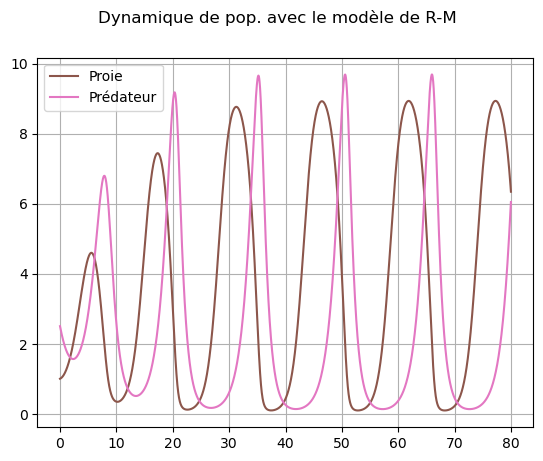

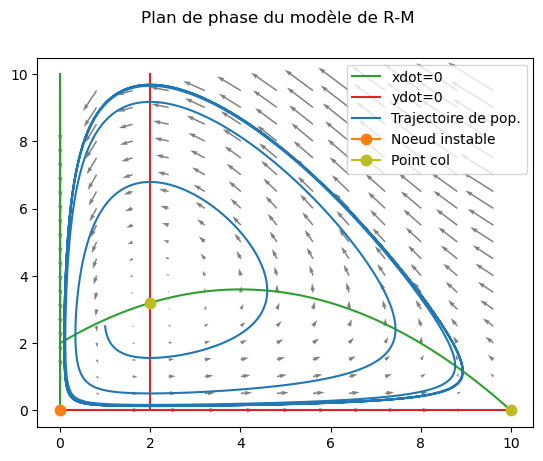

In [71]:
#Dynamique:
##Modèle:
def rma(etat,t,param):
    x,y=etat
    r,K,c,h,b,m=param
    xdot,ydot=[r*x*(1-x/K)-c*x*y/(h+x),b*x*y/(h+x)-m*y]
    return [xdot,ydot]

##Paramètres:
r=1
K=10
c=1
h=2
b=2
m=1

param_rma=np.array([r,K,c,h,b,m])

x0=1
y0=2.5

##Temps:

ti=np.arange(0,80,0.01)

## Résolution:

intrma=odeint(rma,[x0,y0],ti,args=(param_rma,))

## Plot de la dynamique:

fig,ax=plt.subplots(1,1)
fig.suptitle('Dynamique de pop. avec le modèle de R-M')
ax.plot(ti,intrma[:,0],color='C5',label='Proie')
ax.plot(ti,intrma[:,1],color='C6',label='Prédateur')
ax.grid()
ax.legend()
    
#Plan de Phase:

##Calcul des isoclines:
#On a xdot=0 => x=0 ou y = (h+x)*r*(1-x/K)/c
#On a ydot=0 => y=0 ou x=h*m/(b-m)

xi=np.arange(0.01,10,0.01)
yi=np.arange(0.01,10,0.01)

##Tracage du plan de phase

fig1,ax1 = plt.subplots(1,1)
fig1.suptitle('Plan de phase du modèle de R-M')
##xdot=0
ax1.plot(np.zeros_like(xi),xi,color='C2',label='xdot=0')
ax1.plot(xi,(h+xi)*r*(1-xi/K)/c,color='C2')
##ydot=0
ax1.plot(yi,np.zeros_like(yi),color='C3',label='ydot=0')
ax1.plot(h*m/(b-m)*np.ones_like(yi),yi,color='C3')
ax1.legend()

##Ajout de la trajectoire:
ax1.plot(intrma[:,0],intrma[:,1],label='Trajectoire de pop.')

##Ajout des équilibres:
eq1=[0,0]
eq2=[K,0]
xt=h*m/(b-m)
eq3=[xt,(h+xt)*r*(1-xt/K)/c]


ax1.plot(eq1[0],eq1[1],color='C1',label='Noeud instable',marker='.',markersize=15)
ax1.plot(eq2[0],eq2[1],color='C8',label='Point col',marker='.',markersize=15)
ax1.plot(eq3[0],eq3[1],color='C6',label='Foyer instable',marker='.',markersize=15)

ax1.legend()
##Rajout du champ de vecteur 
X=np.arange(0.01,10,0.8)
Y=np.arange(0.01,10,0.5)
gr=np.meshgrid(X,Y)

dX,dY=rma([gr[0],gr[1]],0,param_rma)

ax1.quiver(gr[0],gr[1],dX,dY,angles='xy',color='grey',width=0.003)



### 2) Diagramme de bifurcation

(*On prend pour xdot=0 le y trouvé et on remplace x par sa valeur du plan de phase. En effet en l'observant on observe que c'est cet axe qui influence les équilibres. 
y est négatif (ie la population de prédateur s'éteint) pour K plus petit que mh/(b-m). y est positif (ie il y a co-existence pour K plus grand que mh/(b-m). On caclule la dérivé par rapport à x et on a alors que la dérivée est positive (ie équilibre instable) pour K plus grand que h +2mh/(b-m) et la dérivée est négative pour K plus petit que...*)



⚠️ On peut effectuer la jacobienne du système pour y voir plus clair.

Text(0.5, 0, 'K')

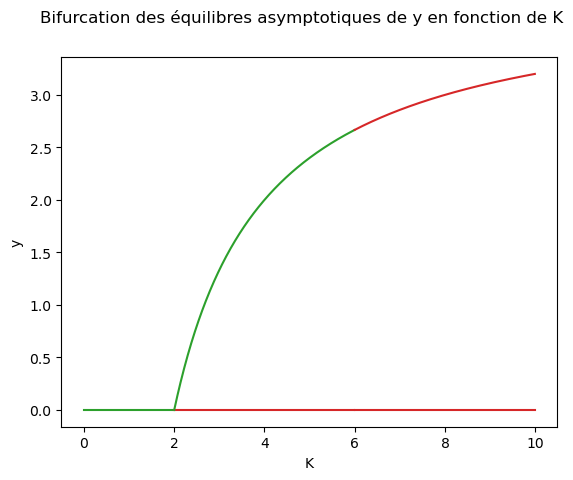

In [79]:
# Pour différentes valeurs de K on a pas les mêmes eq.
x1=np.arange(0,m*h/(b-m),0.01)
x2=np.arange(m*h/(b-m),h+2*m*h/(b-m),0.01)
x3=np.arange(h+2*m*h/(b-m),K,0.01)

fig3,ax3=plt.subplots(1,1)
fig3.suptitle('Bifurcation des équilibres asymptotiques de y en fonction de K')
ax3.plot(x1,np.zeros_like(x1),color='C2',label='Stable')
ax3.plot(x2,np.zeros_like(x2),color='C3',label='Instable')
ax3.plot(x2,(h+xt)*r*(1-xt/x2)/c,color='C2')
ax3.plot(x3,np.zeros_like(x3),color='C3')
ax3.plot(x3,(h+xt)*r*(1-xt/x3)/c,color='C3')
ax3.set_ylabel('y')
ax3.set_xlabel('K')